In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

c:\Users\Juhana\scoop\apps\pyenv\current\pyenv-win\versions\3.11.0rc2\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports
require('ggplot2')
require('ggrepel')
require('readr')
require('tidyverse')
require('extrafont')


R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: ggrepel

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: tidyverse



-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v purrr   1.0.1      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R



In [4]:
df1 = pd.read_csv('airports.csv')
df1.head()


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [6]:
df2= pd.read_csv('runways_cleaned.csv')
df2

,id,airport_ref,ident,length_ft,width_ft
0,269408,6523,00A,80.0,80.0
1,255155,6524,00AK,2500.0,70.0
2,254165,6525,00AL,2300.0,200.0
3,270932,6526,00AR,40.0,40.0
4,322128,322127,00AS,1450.0,60.0
...,...,...,...,...,...
44269,235186,27243,ZYTX,10499.0,148.0
44270,235169,27244,ZYYJ,8530.0,148.0
44271,354997,317861,ZYYK,8202.0,NaN
44272,346789,346788,ZZ-0003,1800.0,15.0


In [7]:
df3 = pd.DataFrame(df2.groupby('ident')['length_ft'].count()).reset_index()
df3

,ident,length_ft
0,00A,1
1,00AK,1
2,00AL,1
3,00AR,1
4,00AS,1
...,...,...
37532,cvb2,1
37533,cwf2,1
37534,lhkk,1
37535,lrpv,1


In [8]:
df4 = df3.rename(columns={'length_ft': 'runway_count'})
df4.head()

,ident,runway_count
0,00A,1
1,00AK,1
2,00AL,1
3,00AR,1
4,00AS,1


In [9]:
df5 = pd.merge(df2, df4, how='inner', on='ident')
df5.head()

,id,airport_ref,ident,length_ft,width_ft,runway_count
0,269408,6523,00A,80.0,80.0,1
1,255155,6524,00AK,2500.0,70.0,1
2,254165,6525,00AL,2300.0,200.0,1
3,270932,6526,00AR,40.0,40.0,1
4,322128,322127,00AS,1450.0,60.0,1


In [10]:
df6 = df2[df2['length_ft'] == df2.groupby('ident')['length_ft'].transform('max')]
df6

,id,airport_ref,ident,length_ft,width_ft
0,269408,6523,00A,80.0,80.0
1,255155,6524,00AK,2500.0,70.0
2,254165,6525,00AL,2300.0,200.0
3,270932,6526,00AR,40.0,40.0
4,322128,322127,00AS,1450.0,60.0
...,...,...,...,...,...
44269,235186,27243,ZYTX,10499.0,148.0
44270,235169,27244,ZYYJ,8530.0,148.0
44271,354997,317861,ZYYK,8202.0,NaN
44272,346789,346788,ZZ-0003,1800.0,15.0


In [11]:
df7 = df6.drop(columns=['id', 'airport_ref', 'width_ft'])
df7

,ident,length_ft
0,00A,80.0
1,00AK,2500.0
2,00AL,2300.0
3,00AR,40.0
4,00AS,1450.0
...,...,...
44269,ZYTX,10499.0
44270,ZYYJ,8530.0
44271,ZYYK,8202.0
44272,ZZ-0003,1800.0


In [12]:
df8 = df7.rename(columns={'length_ft': 'max_runway'})
df8

,ident,max_runway
0,00A,80.0
1,00AK,2500.0
2,00AL,2300.0
3,00AR,40.0
4,00AS,1450.0
...,...,...
44269,ZYTX,10499.0
44270,ZYYJ,8530.0
44271,ZYYK,8202.0
44272,ZZ-0003,1800.0


In [13]:
df9 = pd.merge(df5, df8, how='inner', on='ident')
df9.to_csv('runways_with_count&max.csv', index=False)
df9

,id,airport_ref,ident,length_ft,width_ft,runway_count,max_runway
0,269408,6523,00A,80.0,80.0,1,80.0
1,255155,6524,00AK,2500.0,70.0,1,2500.0
2,254165,6525,00AL,2300.0,200.0,1,2300.0
3,270932,6526,00AR,40.0,40.0,1,40.0
4,322128,322127,00AS,1450.0,60.0,1,1450.0
...,...,...,...,...,...,...,...
46400,235186,27243,ZYTX,10499.0,148.0,1,10499.0
46401,235169,27244,ZYYJ,8530.0,148.0,1,8530.0
46402,354997,317861,ZYYK,8202.0,NaN,1,8202.0
46403,346789,346788,ZZ-0003,1800.0,15.0,1,1800.0


In [14]:
final_df = pd.merge(df1, df9, how='inner', on='ident')

In [15]:
final_df.to_csv('airports_with_runway_data.csv', index=False)

In [17]:
mega_df = pd.read_csv('airports_with_runway_data.csv')\
    .query("type.isin(['medium_airport', 'large_airport'])")
mega_df.head(3)



,id_x,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,...,local_code,home_link,wikipedia_link,keywords,id_y,airport_ref,length_ft,width_ft,runway_count,max_runway
7064,12243,5A8,medium_airport,Aleknagik / New Airport,59.28260,-158.617996,66.0,NaN,US,US-AK,...,5A8,NaN,https://en.wikipedia.org/wiki/Aleknagik_Airport,NaN,258105,12243,2040.0,80.0,1,2040.0
11737,3,AGGH,large_airport,Honiara International Airport,-9.42800,160.054993,28.0,OC,SB,SB-GU,...,NaN,NaN,https://en.wikipedia.org/wiki/Honiara_Internat...,Henderson Field,233754,3,7218.0,148.0,1,7218.0
11742,4,AGGM,medium_airport,Munda Airport,-8.32797,157.263000,10.0,OC,SB,SB-WE,...,NaN,NaN,https://en.wikipedia.org/wiki/Munda_Airport,NaN,233755,4,4593.0,98.0,1,4593.0


In [18]:
airport_df = mega_df[['ident', 'iata_code', 'type', 'name', 'iso_country', 'latitude_deg', 'longitude_deg', 'elevation_ft', 'runway_count', 'max_runway']]
airport_df.head()

,ident,iata_code,type,name,iso_country,latitude_deg,longitude_deg,elevation_ft,runway_count,max_runway
7064,5A8,WKK,medium_airport,Aleknagik / New Airport,US,59.282600,-158.617996,66.0,1,2040.0
11737,AGGH,HIR,large_airport,Honiara International Airport,SB,-9.428000,160.054993,28.0,1,7218.0
11742,AGGM,MUA,medium_airport,Munda Airport,SB,-8.327970,157.263000,10.0,1,4593.0
11759,AHJ,AHJ,medium_airport,Hongyuan Airport,CN,32.531540,102.352240,11600.0,1,11811.0
11970,ANYN,INU,medium_airport,Nauru International Airport,NR,-0.547458,166.919006,22.0,1,7054.0


In [19]:
df10 = pd.DataFrame(mega_df.groupby('ident')['length_ft'].mean()).reset_index()
df10

,ident,length_ft
0,5A8,2040.0
1,AGGH,7218.0
2,AGGM,4593.0
3,AHJ,11811.0
4,ANYN,7054.0
...,...,...
4815,ZYTN,7546.0
4816,ZYTX,10499.0
4817,ZYYJ,8530.0
4818,ZYYK,8202.0


In [20]:
df10.rename(columns={'length_ft': 'avg_runway'}, inplace=True)
df10


,ident,avg_runway
0,5A8,2040.0
1,AGGH,7218.0
2,AGGM,4593.0
3,AHJ,11811.0
4,ANYN,7054.0
...,...,...
4815,ZYTN,7546.0
4816,ZYTX,10499.0
4817,ZYYJ,8530.0
4818,ZYYK,8202.0


In [21]:
ultimate_df = pd.merge(airport_df, df10, how='inner', on='ident')
ultimate_df

,ident,iata_code,type,name,iso_country,latitude_deg,longitude_deg,elevation_ft,runway_count,max_runway,avg_runway
0,5A8,WKK,medium_airport,Aleknagik / New Airport,US,59.282600,-158.617996,66.0,1,2040.0,2040.0
1,AGGH,HIR,large_airport,Honiara International Airport,SB,-9.428000,160.054993,28.0,1,7218.0,7218.0
2,AGGM,MUA,medium_airport,Munda Airport,SB,-8.327970,157.263000,10.0,1,4593.0,4593.0
3,AHJ,AHJ,medium_airport,Hongyuan Airport,CN,32.531540,102.352240,11600.0,1,11811.0,11811.0
4,ANYN,INU,medium_airport,Nauru International Airport,NR,-0.547458,166.919006,22.0,1,7054.0,7054.0
...,...,...,...,...,...,...,...,...,...,...,...
7507,ZYTL,DLC,large_airport,Dalian Zhoushuizi International Airport,CN,38.965698,121.539001,107.0,1,10827.0,10827.0
7508,ZYTN,TNH,medium_airport,Tonghua Sanyuanpu Airport,CN,42.253889,125.703333,1200.0,1,7546.0,7546.0
7509,ZYTX,SHE,large_airport,Shenyang Taoxian International Airport,CN,41.639801,123.483002,198.0,1,10499.0,10499.0
7510,ZYYJ,YNJ,medium_airport,Yanji Chaoyangchuan Airport,CN,42.882801,129.451004,624.0,1,8530.0,8530.0


In [22]:
ultimate_df.drop_duplicates(inplace = True)
ultimate_df

,ident,iata_code,type,name,iso_country,latitude_deg,longitude_deg,elevation_ft,runway_count,max_runway,avg_runway
0,5A8,WKK,medium_airport,Aleknagik / New Airport,US,59.282600,-158.617996,66.0,1,2040.0,2040.0
1,AGGH,HIR,large_airport,Honiara International Airport,SB,-9.428000,160.054993,28.0,1,7218.0,7218.0
2,AGGM,MUA,medium_airport,Munda Airport,SB,-8.327970,157.263000,10.0,1,4593.0,4593.0
3,AHJ,AHJ,medium_airport,Hongyuan Airport,CN,32.531540,102.352240,11600.0,1,11811.0,11811.0
4,ANYN,INU,medium_airport,Nauru International Airport,NR,-0.547458,166.919006,22.0,1,7054.0,7054.0
...,...,...,...,...,...,...,...,...,...,...,...
7507,ZYTL,DLC,large_airport,Dalian Zhoushuizi International Airport,CN,38.965698,121.539001,107.0,1,10827.0,10827.0
7508,ZYTN,TNH,medium_airport,Tonghua Sanyuanpu Airport,CN,42.253889,125.703333,1200.0,1,7546.0,7546.0
7509,ZYTX,SHE,large_airport,Shenyang Taoxian International Airport,CN,41.639801,123.483002,198.0,1,10499.0,10499.0
7510,ZYYJ,YNJ,medium_airport,Yanji Chaoyangchuan Airport,CN,42.882801,129.451004,624.0,1,8530.0,8530.0


In [23]:
ultimate_df.to_csv('airports_final_product.csv', index=False)

In [25]:
piv = ultimate_df \
    .pivot_table(index='type', 
                 values='elevation_ft', 
                 aggfunc=['mean', 'median', 'std', 'count'])
piv

,mean,median,std,count
,elevation_ft,elevation_ft,elevation_ft,elevation_ft
type,,,,
large_airport,764.973856,162.0,1508.581946,459
medium_airport,1068.992343,399.0,1669.299733,4310


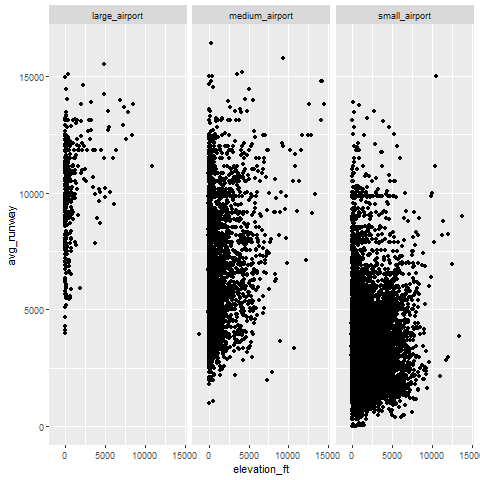

In [37]:
%%R -i airport_df
# Plot + 
# Aesthetics
ggplot(airport_df) +
    aes(x=mat_runway, y=) +
    geom_point() +
    facet_wrap(~type) 

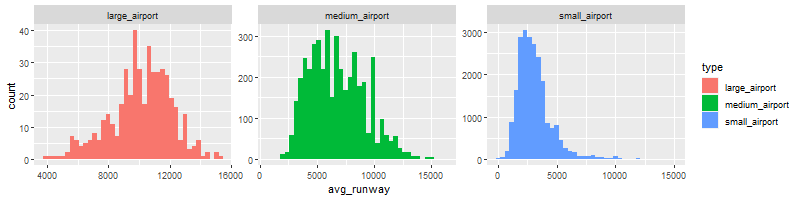

In [40]:
%%R -w 800 -h200

# Plot +
# Aesthetics + 
# Geom
ggplot(airport_df) + 
    aes(x=avg_runway, fill=type) +
    geom_histogram(bins=40) +
    facet_wrap(~type, nrow=1, scales="free")

In [ ]:
piv = airports \
    .pivot_table(index='pollster', 
                 values='error', 
                 aggfunc=['mean', 'median', 'std', 'count']) \
    #.sort_values(by=('mean', 'error'))\

# filter out any pollster with less than 10 polls
piv[piv[('count','error')] > 10].tail(25)